In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)

In [3]:
# Load the data

app_data = pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# shape of dataset

app_data.shape

(307511, 122)

In [5]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [6]:
#describe dataset

app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
# null content in dataset

app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
# Null percentage in dataset

null_percent = round(100*(app_data.isnull().sum()/len(app_data.index)),2)
null_percent

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [9]:
# null percentage >= 50%

null_percent = null_percent[null_percent>=50]
null_percent

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [10]:
# Drop null_percent data with missing values >= 50%

dropped_data = ([null_percent[null_percent >= 50.00].index])
app_data.drop(labels=dropped_data[0], axis=1, inplace=True)

In [11]:
app_data.shape

(307511, 81)

In [12]:
# Check the remaining data

round(100*(app_data.isnull().sum()/len(app_data.index)), 2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [13]:
# Drop the columns which are not required and with more missing values

drop_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI']

app_data.drop(labels = drop_col, axis = 1, inplace=True)

In [14]:
# Checking the columns after dropping unncessary columns

100*(app_data.isnull().sum()/len(app_data.index))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

In [15]:
# Missing values in AMT_ANNUITY

app_data.AMT_ANNUITY.isnull().sum()

12

In [123]:
# Since only 12 values are missing in AMT_ANNUITY out of 3,07,511 which is 0.0039%. 
# We can replace the missing values with Median value of AMT_ANNUITY.

In [16]:
# Missing values in AMT_GOODS_PRICE

app_data.AMT_GOODS_PRICE.isnull().sum()

278

In [17]:
# Since only 278 values are missing in AMT_GOODS_PRICE out of 3,07,511 which is 0.09%. 
# We can replace the missing values with Median value of AMT_GOODS_PRICE.

In [18]:
# Missing values in NAME_TYPE_SUITE

app_data.NAME_TYPE_SUITE.isnull().sum()

1292

In [19]:
# Percentage of each NAME_TYPE_SUITE type

app_data.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [20]:
# We have 1292 missing values in NAME_TYPE_SUITE, which is 0.42%
# Here, Unaccompanied is Mode, we will replace missing values with the Mode i.e with "Unaccompanied"

In [21]:
# Missing values in EXT_SOURCE_2

app_data.EXT_SOURCE_2.isnull().sum()

660

In [22]:
# We have 660 missing values in EXT_SOURCE_2 column, which is 0.21%
# We will impute the missing values with 0

In [23]:
# Missing values in OCCUPATION_TYPE

app_data.OCCUPATION_TYPE.isnull().sum()

96391

In [24]:
# Percentage of Occupation type

app_data.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [25]:
# Mode of occupation type

app_data.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

In [26]:
# We impute the missing values with the mode of the OCCUPATION_TYPE data
# We replace it with 'Laborers'

In [27]:
# Check categorical values or continous values

app_data.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_LIVE_REGION          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REG_REGION_NOT_WORK_REGION          2
CODE_GENDER                         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PR

In [28]:
# Changing negative ages to positive ages

app_data['DAYS_BIRTH']=abs(app_data['DAYS_BIRTH'])
app_data['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [29]:
# Changing negative values to positive values

app_data.DAYS_EMPLOYED=abs(app_data.DAYS_EMPLOYED)
app_data.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [30]:
# Changing negative values to positive values

app_data.DAYS_REGISTRATION=abs(app_data.DAYS_REGISTRATION)
app_data.DAYS_REGISTRATION.describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [31]:
# Changing negative values to positive values

app_data.DAYS_ID_PUBLISH=abs(app_data.DAYS_ID_PUBLISH)
app_data.DAYS_ID_PUBLISH.describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [32]:
# convert data type of categorical columns

app_data['REG_REGION_NOT_LIVE_REGION'] = app_data['REG_REGION_NOT_LIVE_REGION'].astype(object)
app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION      object
REG_REGION_NOT_WORK_REGIO

In [33]:
app_data['REG_REGION_NOT_WORK_REGION'] = app_data['REG_REGION_NOT_WORK_REGION'].astype(object)
app_data['REG_CITY_NOT_LIVE_CITY'] = app_data['REG_CITY_NOT_LIVE_CITY'].astype(object)
app_data['REG_CITY_NOT_WORK_CITY'] = app_data['REG_CITY_NOT_WORK_CITY'].astype(object)
app_data['LIVE_CITY_NOT_WORK_CITY'] = app_data['LIVE_CITY_NOT_WORK_CITY'].astype(object)

app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# AMT_ANNUITY variable

app_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

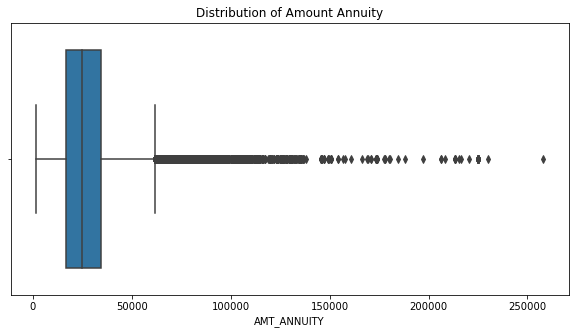

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(app_data.AMT_ANNUITY)
plt.title('Distribution of Amount Annuity')
plt.show()

As we take a look at AMT_ANNUITY column we can see that there are outliers at more than 250000. But there is no much differece between the mean and median, We can impute the outliers with Median here

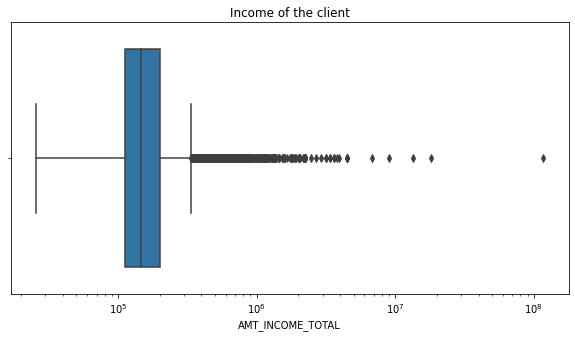

In [36]:
# AMT_INCOME_TOTAL variable

plt.figure(figsize=(10,5))
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.xscale('log')
plt.title('Income of the client')
plt.show()

In [37]:
app_data.AMT_INCOME_TOTAL.quantile([0, 0.25, 0.5, 0.7, 0.9,0.95,0.99, 1.00])

0.00        25650.0
0.25       112500.0
0.50       147150.0
0.70       180000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In AMT_INCOME_TOTAL, extreme value is 1.17 x 10^8. Here, there is a big difference between 95th quartile and maximum value,
hence there are outliers in the dataset.

# AMT_CREDIT variable

In [38]:
app_data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

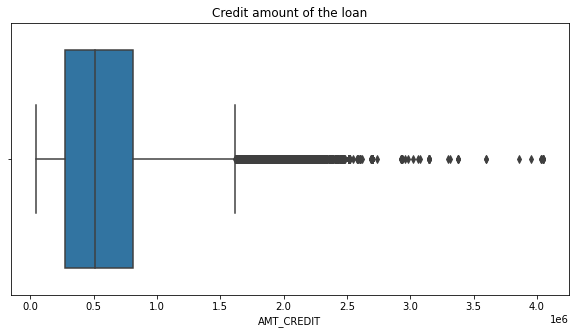

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(app_data.AMT_CREDIT)
plt.title('Credit amount of the loan')
plt.show()

In [40]:
app_data.AMT_CREDIT.quantile([0,0.25,0.5,0.75,0.9,0.95,0.99,1.0])

0.00      45000.0
0.25     270000.0
0.50     513531.0
0.75     808650.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In AMT_CREDIT, extreme value is 4.05 x 10^6. Here, there is a big difference between 95th quartile and maximum value, hence there are outliers in the dataset. Amount credited also varies from person to person.

# DAYS_BIRTH variable

In [41]:
app_data.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

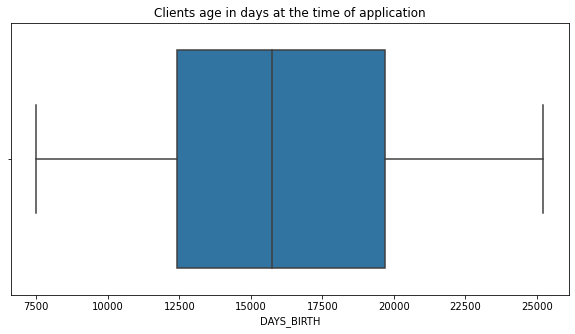

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(app_data.DAYS_BIRTH)
plt.title('Clients age in days at the time of application')
plt.show()

In [43]:
app_data.DAYS_BIRTH.quantile([0,0.2,0.5,0.7,.9,.95,.99])

0.00     7489.0
0.20    11694.0
0.50    15750.0
0.70    18885.0
0.90    22181.0
0.95    23204.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

Here, the maximum age of applicant is 25229 and 95th quantile is 23204 and the difference between mean and median is also not much, there are no outlier, hence we can conclide the applicants are of similar age

# DAYS_EMPLOYED variable

In [44]:
app_data.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

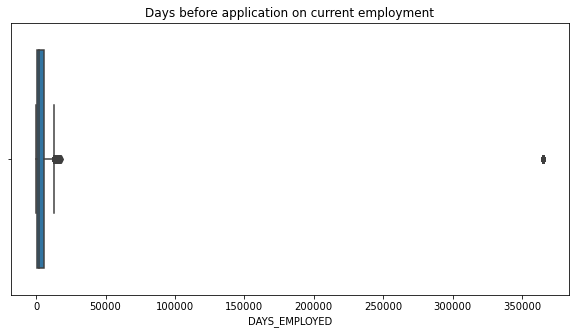

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(app_data.DAYS_EMPLOYED)
plt.title('Days before application on current employment')
plt.show()

DAYS_EMPLOYED column has outliers at 365243. Number of days the person was employed varies from person to person

# Binning Continuous Variable

AMT_INCOME_TOTAL variable

In [46]:
# Create bin for credit amount

bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

app_data['AMT_CREDIT_RANGE'] = pd.cut(app_data['AMT_CREDIT'], bins=bins, labels=slots)

In [47]:
# Creating bins for income amount

bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [48]:
# Creating bins for days_birth

bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

app_data['AGE_RANGE']=pd.cut(app_data['DAYS_BIRTH'],bins,labels=slot)

In [49]:
#Checking bin columns created in df.
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,50-60


# Analysis

Checking the imbalance percentage

In [50]:
# Checking the imbalance percentage

100*(app_data.TARGET.value_counts())/ (len(app_data))

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

8% clients had payment difficulties, whereas 92% had no difficulty

In [51]:
# Dividing the dataset into two dataset of target=1 (client with payment difficulties) and target=0 (all other)

target_1 = app_data[app_data['TARGET']==1]
target_0 = app_data[app_data['TARGET']==0]

In [52]:
#Dataframe having target values 0

target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Medium,Low,40-50


In [53]:
#Dataframe having target values 1

target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,Cooking staff,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,High,Low,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,High,Medium,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,Sales staff,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Low,Low,30-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391.0,4199,NaN,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,60-70


# Univariate analysis for target = 0 and target = 1

Numeric Variable

Age

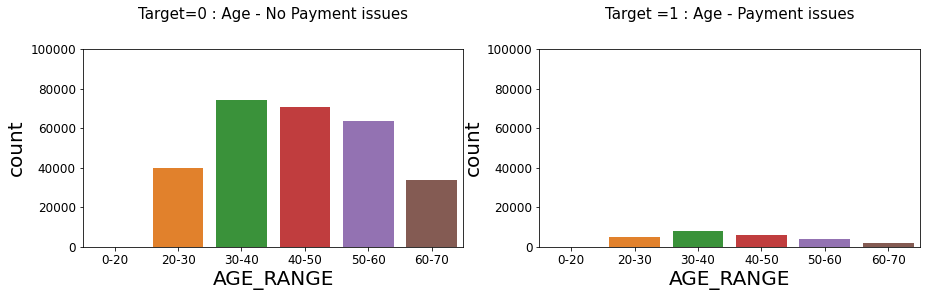

In [147]:
# Numeric analysis for target_0 and target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0, 100000)
plt.title('Target=0 : Age - No Payment issues')
sns.countplot(target_0['AGE_RANGE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Age - Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AGE_RANGE'])
plt.show()

 It can be observed, customers with age from 30 to 40 years can make payments regularly, we can consider this segment for lending loan, customers from age 40 to 60 years also make the payment

Amount Credit range

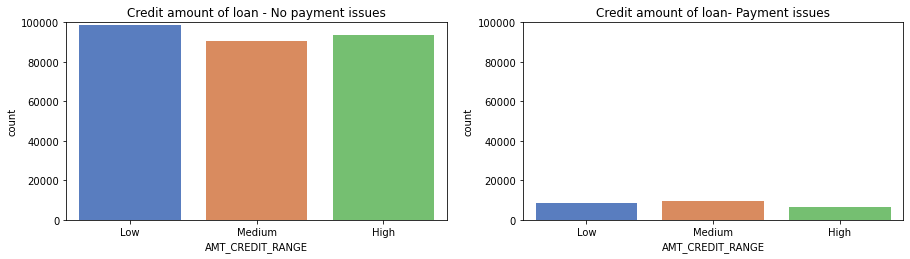

In [55]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan - No payment issues')
sns.countplot(target_0['AMT_CREDIT_RANGE'],palette='muted')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AMT_CREDIT_RANGE'], palette='muted')
plt.show()

Customers with less credit and most likely to make payment. Customers having medium and high credit can also be considered while lending the loan

Categorical Variable

Occupation_type

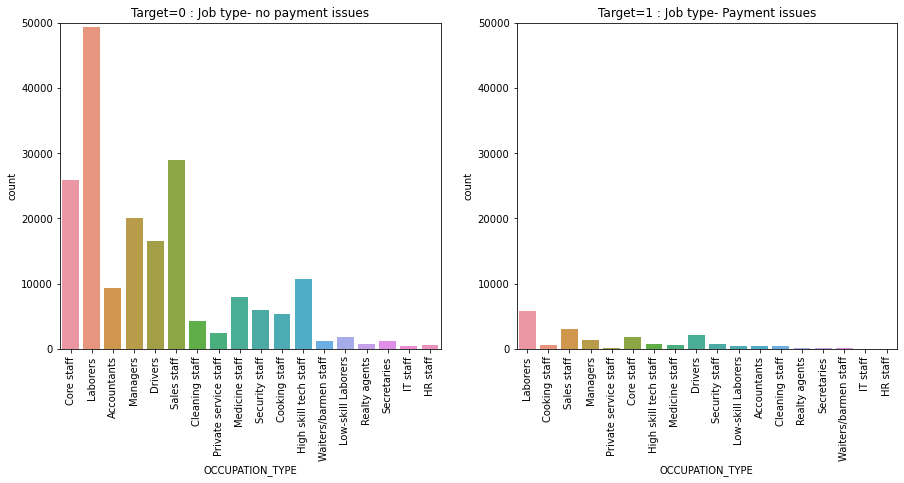

In [56]:
# Categorical variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
#plt.subplots_adjust(wspace=0.5)


sns.countplot(target_0['OCCUPATION_TYPE'])
plt.title('Target=0 : Job type- no payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['OCCUPATION_TYPE'])
plt.title('Target=1 : Job type- Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()

The plot clearly shows that labourers are most likely to make payment on time whereas HR staff are less likely to make payment on time

Name_Income_Type

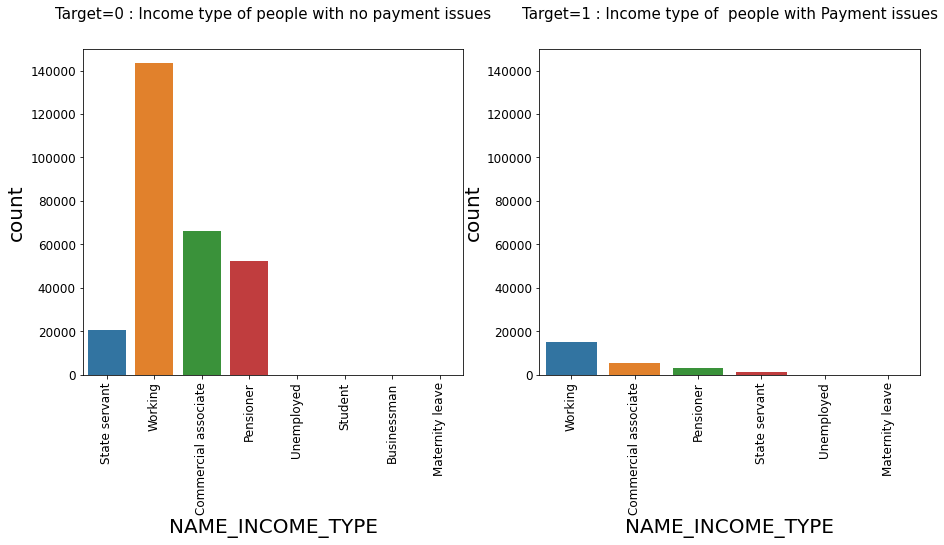

In [57]:
# Categorical variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.subplot(1, 2, 1)
#plt.title()
sns.countplot(target_0['NAME_INCOME_TYPE'].dropna())
plt.title('Target=0 : Income type of people with no payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_INCOME_TYPE'].dropna())
plt.title('Target=1 : Income type of  people with Payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)
plt.show()

The plot clearly shows that labourers are most likely to make payment on time whereas HR staff are less likely to make payment on time

Analyse continuous column with respect to the target column

Credit Amount

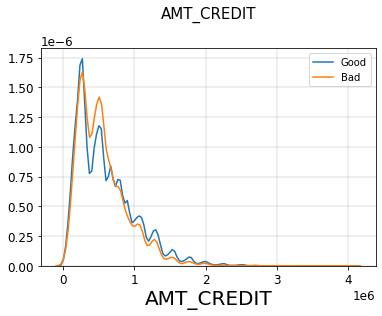

In [58]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_CREDIT'], hist = False, label="Good")# Target = 0
sns.distplot(target_1['AMT_CREDIT'], hist = False, label='Bad')# Taget = 1
plt.title('AMT_CREDIT')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

Amount Annuity

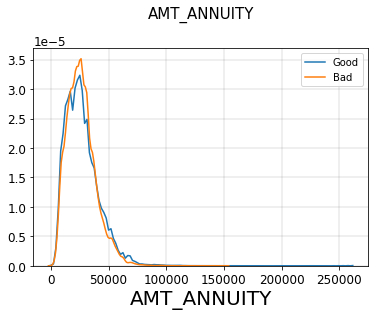

In [59]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_ANNUITY'], hist = False, label="Good")# Target = 0
sns.distplot(target_1['AMT_ANNUITY'], hist = False, label="Bad")# Taget = 1
plt.title('AMT_ANNUITY')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

Goods price

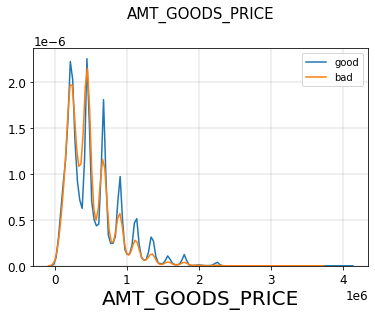

In [60]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_GOODS_PRICE'], hist = False,label= "good")# Target = 0
sns.distplot(target_1['AMT_GOODS_PRICE'], hist = False, label="bad")# Taget = 1
plt.title('AMT_GOODS_PRICE')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

Analyse Categorical variables with respect to Target variable

In [61]:
#Plot mutiple categorical columns with respect to Target column: Subplot
features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
list(enumerate(features))

[(0, 'CODE_GENDER'),
 (1, 'NAME_INCOME_TYPE'),
 (2, 'NAME_EDUCATION_TYPE'),
 (3, 'NAME_FAMILY_STATUS'),
 (4, 'NAME_HOUSING_TYPE'),
 (5, 'OCCUPATION_TYPE')]

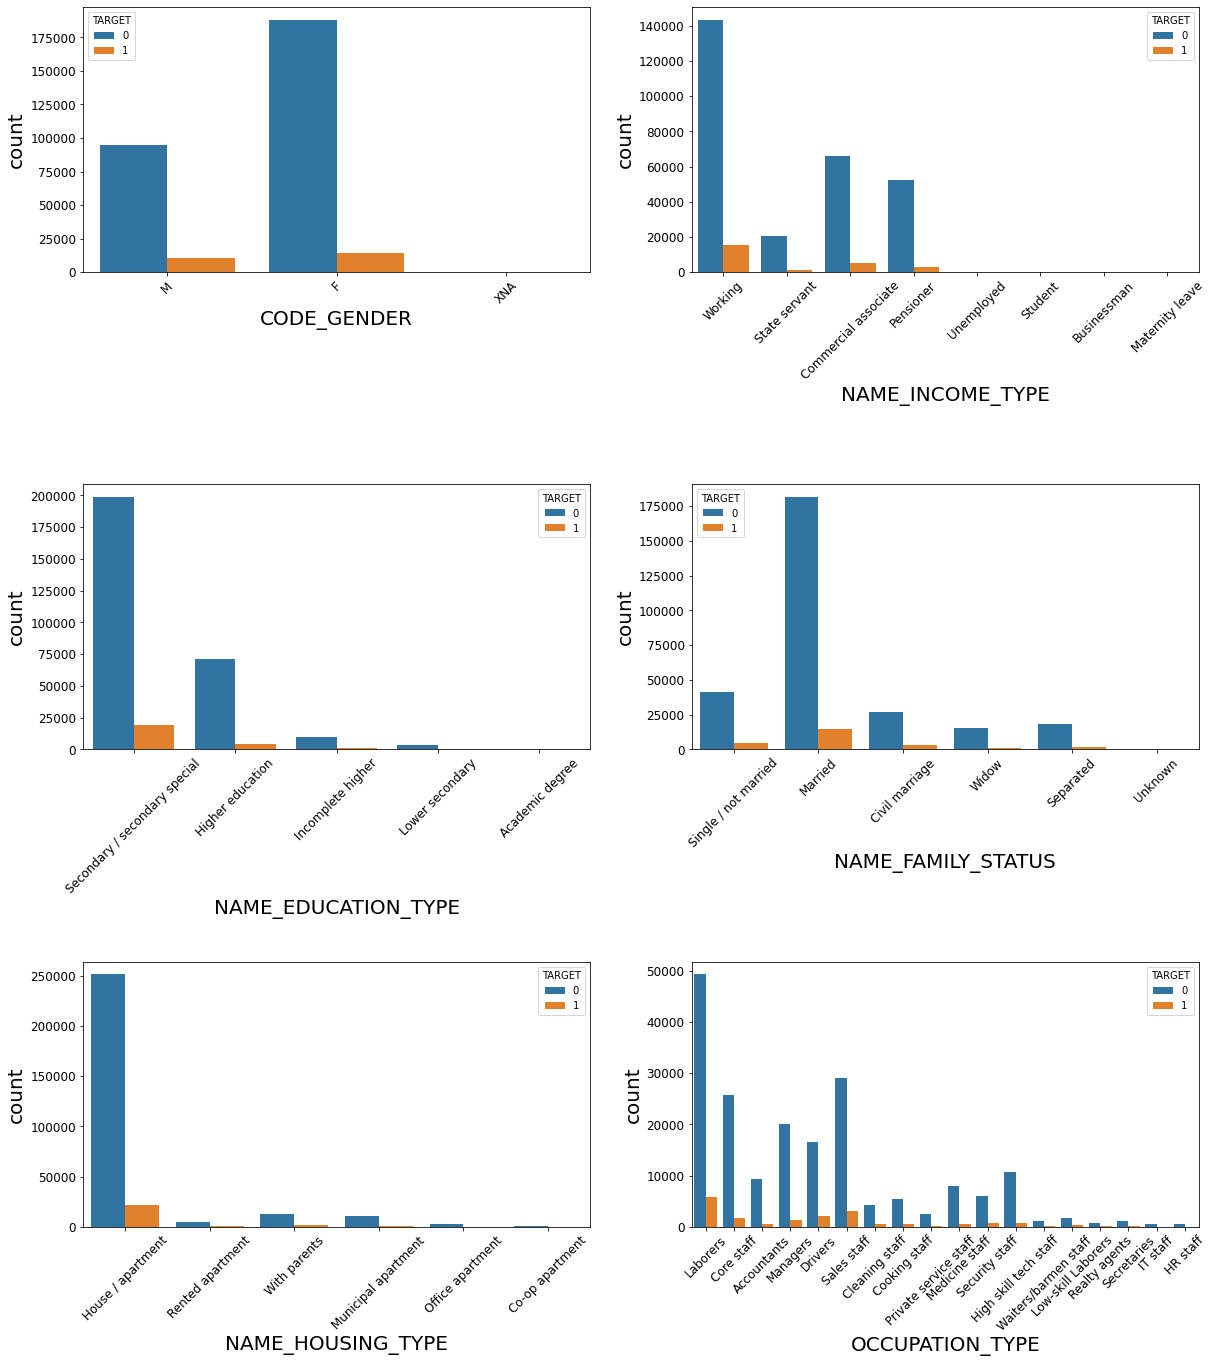

In [62]:
features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = app_data)
    plt.xticks(rotation = 45)

From the above plot we can see that,

Female customers pay loan amount on time and banks can target more female cusytomers for lending loan.

Working customers can be targetted to lend loans as they have higher percentage of making payments on time.

Customers with secondary education are most likely to make payments when compared to customers with academic degree.

Married customers have paid loan amount on time when compared to widows.

Customers owning House/apartment are most likely to make payments on time compared to those living in CO-OP apartment.

Labourers have high repayement percentage. Hence baks can think of lending small amount loans to them.

# Correlation Matrix

In [63]:
#correlation matrix for all numerical columns
corr=target_0.corr()
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,-0.000115,0.002784,0.001589,-0.000695,0.000556,-0.000741,0.002382,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,-0.005244,0.017326,-0.015455,0.014471,-0.002246,0.014137,-0.002172,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.076743,0.127701,0.139598,-0.027828,-0.027621,-0.027690,-0.027593,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.053619,0.054250,0.129140,-0.000914,-0.019851,-0.000892,-0.022225,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.053589,0.075487,0.126615,-0.013091,-0.022535,-0.012893,-0.023385,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,-0.068609,-0.015916,0.003649,0.062766,0.054414,0.135694,-0.000707,-0.021025,-0.000723,-0.023171,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,-0.007198,0.052083,0.001071,0.172814,0.083965,0.198493,-0.012107,0.005941,-0.011591,0.002255,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,0.001346,NaN,-0.336966,-0.062609,0.047378,-0.012263,0.044565,0.025244,1.000000,0.626114,0.333151,0.271314,-0.095916,-0.071648,0.078158,-0.007726,0.003057,-0.007316,0.000990,-0.004461,-0.002772,0.001069,-0.002855,0.011335,0.072886
DAYS_EMPLOYED,0.001744,NaN,-0.245174,-0.140392,-0.070104,-0.104978,-0.068609,-0.007198,0.626114,1.000000,0.214511,0.276663,-0.095455,-0.098920,-0.028530,0.007272,0.019379,0.007453,0.016383,-0.004460,-0.000874,0.002223,-0.034890,0.015116,0.052169


To get rid of the repeated correlation values between two variables we perform the following steps

In [64]:
#Convert the diagonal and below diagonal values of matrix to False, Whereever False is there is replaced with NaN on execution
corr=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,-0.000115,0.002784,0.001589,-0.000695,0.000556,-0.000741,0.002382,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,NaN,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,-0.005244,0.017326,-0.015455,0.014471,-0.002246,0.014137,-0.002172,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.076743,0.127701,0.139598,-0.027828,-0.027621,-0.027690,-0.027593,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.053619,0.054250,0.129140,-0.000914,-0.019851,-0.000892,-0.022225,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,NaN,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.053589,0.075487,0.126615,-0.013091,-0.022535,-0.012893,-0.023385,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103827,0.044565,-0.068609,-0.015916,0.003649,0.062766,0.054414,0.135694,-0.000707,-0.021025,-0.000723,-0.023171,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025244,-0.007198,0.052083,0.001071,0.172814,0.083965,0.198493,-0.012107,0.005941,-0.011591,0.002255,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626114,0.333151,0.271314,-0.095916,-0.071648,0.078158,-0.007726,0.003057,-0.007316,0.000990,-0.004461,-0.002772,0.001069,-0.002855,0.011335,0.072886
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214511,0.276663,-0.095455,-0.098920,-0.028530,0.007272,0.019379,0.007453,0.016383,-0.004460,-0.000874,0.002223,-0.034890,0.015116,0.052169


In [65]:
#convert it to dataframe
corrdf = corr.unstack().reset_index()
corrdf.head()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [66]:
#Changing the names of solumns
corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [67]:
#Drop the columns having the missing data
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.head()

,VAR1,VAR2,Correlation
50,CNT_CHILDREN,SK_ID_CURR,-0.000716
75,AMT_INCOME_TOTAL,SK_ID_CURR,0.001739
77,AMT_INCOME_TOTAL,CNT_CHILDREN,0.027397
100,AMT_CREDIT,SK_ID_CURR,-0.000342
102,AMT_CREDIT,CNT_CHILDREN,0.003081


In [68]:
#Rounding off the values
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf.head()

,VAR1,VAR2,Correlation
50,CNT_CHILDREN,SK_ID_CURR,-0.00
75,AMT_INCOME_TOTAL,SK_ID_CURR,0.00
77,AMT_INCOME_TOTAL,CNT_CHILDREN,0.03
100,AMT_CREDIT,SK_ID_CURR,-0.00
102,AMT_CREDIT,CNT_CHILDREN,0.00


In [69]:
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.head()

,VAR1,VAR2,Correlation
50,CNT_CHILDREN,SK_ID_CURR,0.00
75,AMT_INCOME_TOTAL,SK_ID_CURR,0.00
77,AMT_INCOME_TOTAL,CNT_CHILDREN,0.03
100,AMT_CREDIT,SK_ID_CURR,0.00
102,AMT_CREDIT,CNT_CHILDREN,0.00


In [70]:
#Sorting the correlation values
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
440,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
154,AMT_GOODS_PRICE,AMT_CREDIT,0.99
466,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
155,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
129,AMT_ANNUITY,AMT_CREDIT,0.77
233,DAYS_EMPLOYED,DAYS_BIRTH,0.63
128,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
153,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35
103,AMT_CREDIT,AMT_INCOME_TOTAL,0.34
202,DAYS_BIRTH,CNT_CHILDREN,0.34


We can see that for Target_0 dataframe, Social circle for 30 days and 60 days are most correlated and Goods price and Loan amount credit are highly correlated.Then we have Goods price and amount annuity on 4th place

In [71]:
#For target_1 dataframe we perform the same operations to find correlation
corr = target_1.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute valucorrdf['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
440,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
154,AMT_GOODS_PRICE,AMT_CREDIT,0.98
466,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
155,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
129,AMT_ANNUITY,AMT_CREDIT,0.75
233,DAYS_EMPLOYED,DAYS_BIRTH,0.58
441,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.34
415,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.33
258,DAYS_REGISTRATION,DAYS_BIRTH,0.29
465,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.26


From the observation above we can say that for target_1 dataframe Goods price and loan credit amount are most correlated next to social circle observations for different days. So the variables correlated in target_0 dataframe and target_1 dataframe are same with slightly verying correlation values

# Bivariate Analysis for target 0 and target 1

Numeric-Numeric Analysis

There are three ways to analyse the numeric- numeric data types simultaneously. Scatter plot: describes the pattern that how one variable is varying with other variable. Correlation matrix: to describe the linearity of two numeric variables. Pair plot: group of scatter plots of all numeric variables in the data frame

Income vs Credit, Goods price vs Credit

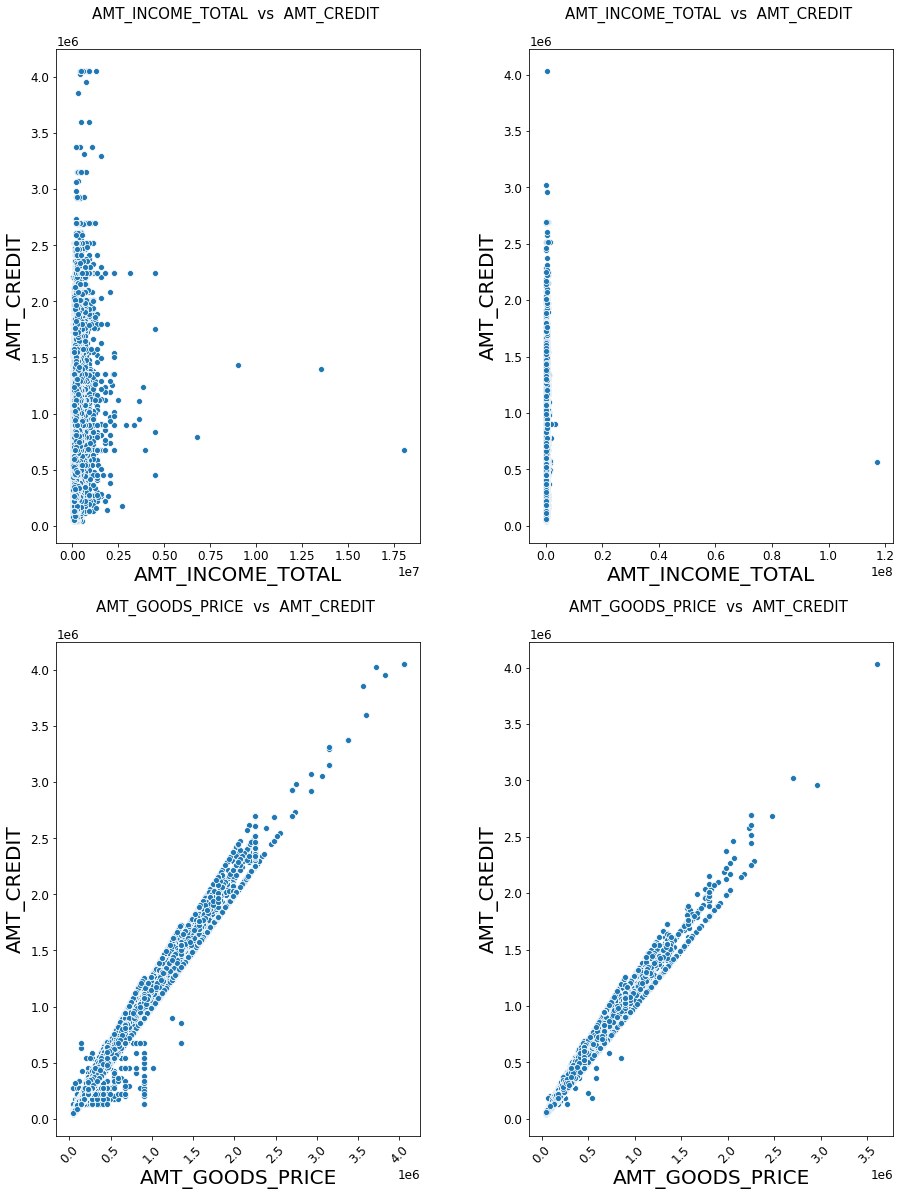

In [72]:
#Scatter plot for numeric columns

plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(target_0.AMT_INCOME_TOTAL,target_0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(target_1.AMT_INCOME_TOTAL,target_1.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')


plt.subplot(2,2,3)
sns.scatterplot(target_0.AMT_GOODS_PRICE,target_0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(target_1.AMT_GOODS_PRICE,target_1.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)
plt.show()

Those who have paid the loan amount on/within time are more likely to get higher credits than those who didnt pay/did late payments.People who have higher goods price and have made payments on time have higher credits than those with higher goods price but didnt pay loan.

Numerical categorical analysis

Income range- Gender

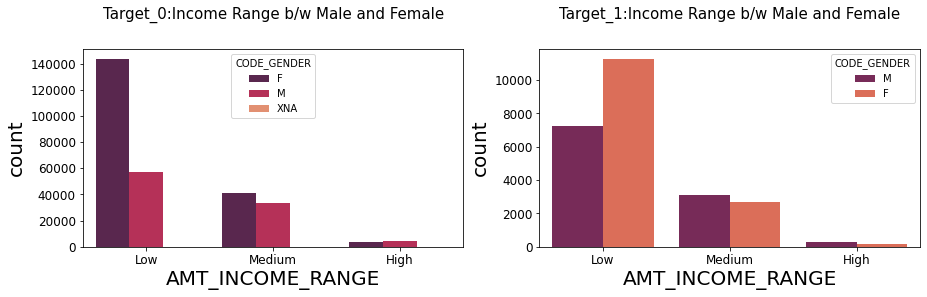

In [73]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Target_0:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_0, palette='rocket')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target_1:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_1,palette='rocket')
plt.show()

We can see that Females with low income don’t have any payment issues.

Credit amount vs Education Status

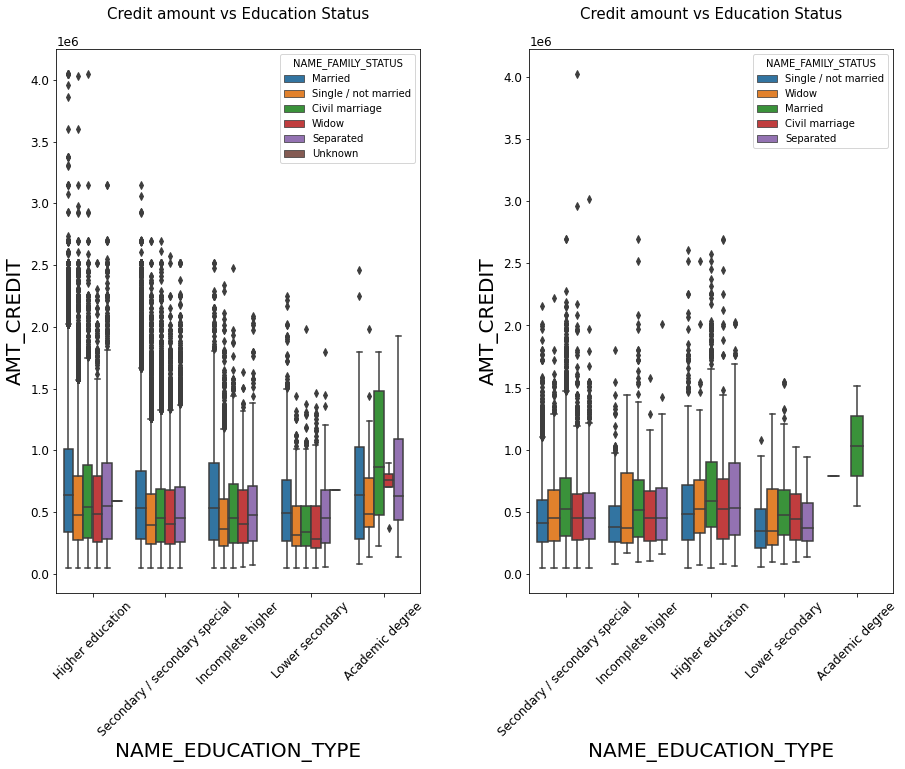

In [74]:
# Box plotting for Credit amount

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)
plt.show()

From the above plot,we can see that

1.Some of the highly educated, married person are having credits higher than those who have done lower secondary eduction.

2.Those with higher eduction have higher credits and are more likely to make payments on time.

3.More number of outliers are seen in higher education.

4.The people with secondary and secndary special eduction are less likely to make payments on time.

Income vs Education Status

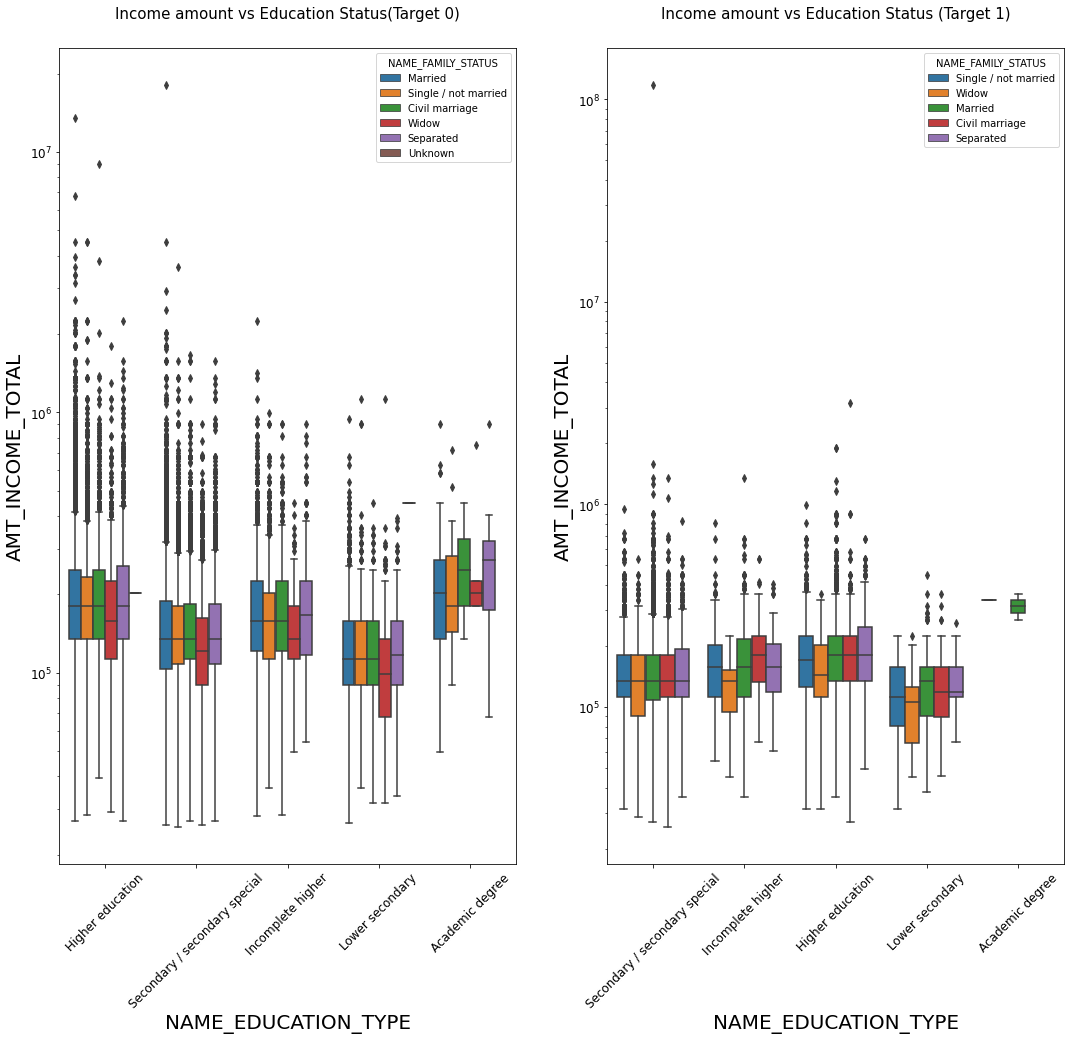

In [75]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(18,15))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status(Target 0)')
plt.xticks(rotation=45)



plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Target 1)')
plt.xticks(rotation=45)
plt.show()

From the above plots,

1.we can see that Higher education has many outliers.

2.People with higher eductaion have higher income and dont have difficulties in making loan payment.

3.People with higher education who ave lesser income are unable to pay the loan.

Hence we can conclude that,people with Higher income are most likely to make payments.

## Previous Application

In [81]:
previous = pd.read_csv('previous_application.csv');

In [82]:
print("Previous Application Data shape: ",previous.shape)

Previous Application Data shape:  (1670214, 37)


## Percentage of missing in each column

In [84]:
(previous.isna().sum()/previous.shape[0])*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

## Dropping Columns where missing values is more than 30%

In [85]:
prev_cols_null_percentages = pd.DataFrame((previous.isna().sum()/previous.shape[0])*100,columns=['pt'])
previous = previous[prev_cols_null_percentages[prev_cols_null_percentages['pt']<30].index]
previous = previous.dropna()

In [86]:
previous.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

## Getting list of Numerical Columns and Categorical Columns

In [87]:
numerical_cols = list(previous.select_dtypes(['int64','float64']).columns)
categorical_cols = list(previous.select_dtypes(['object',]).columns)

In [88]:
numerical_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

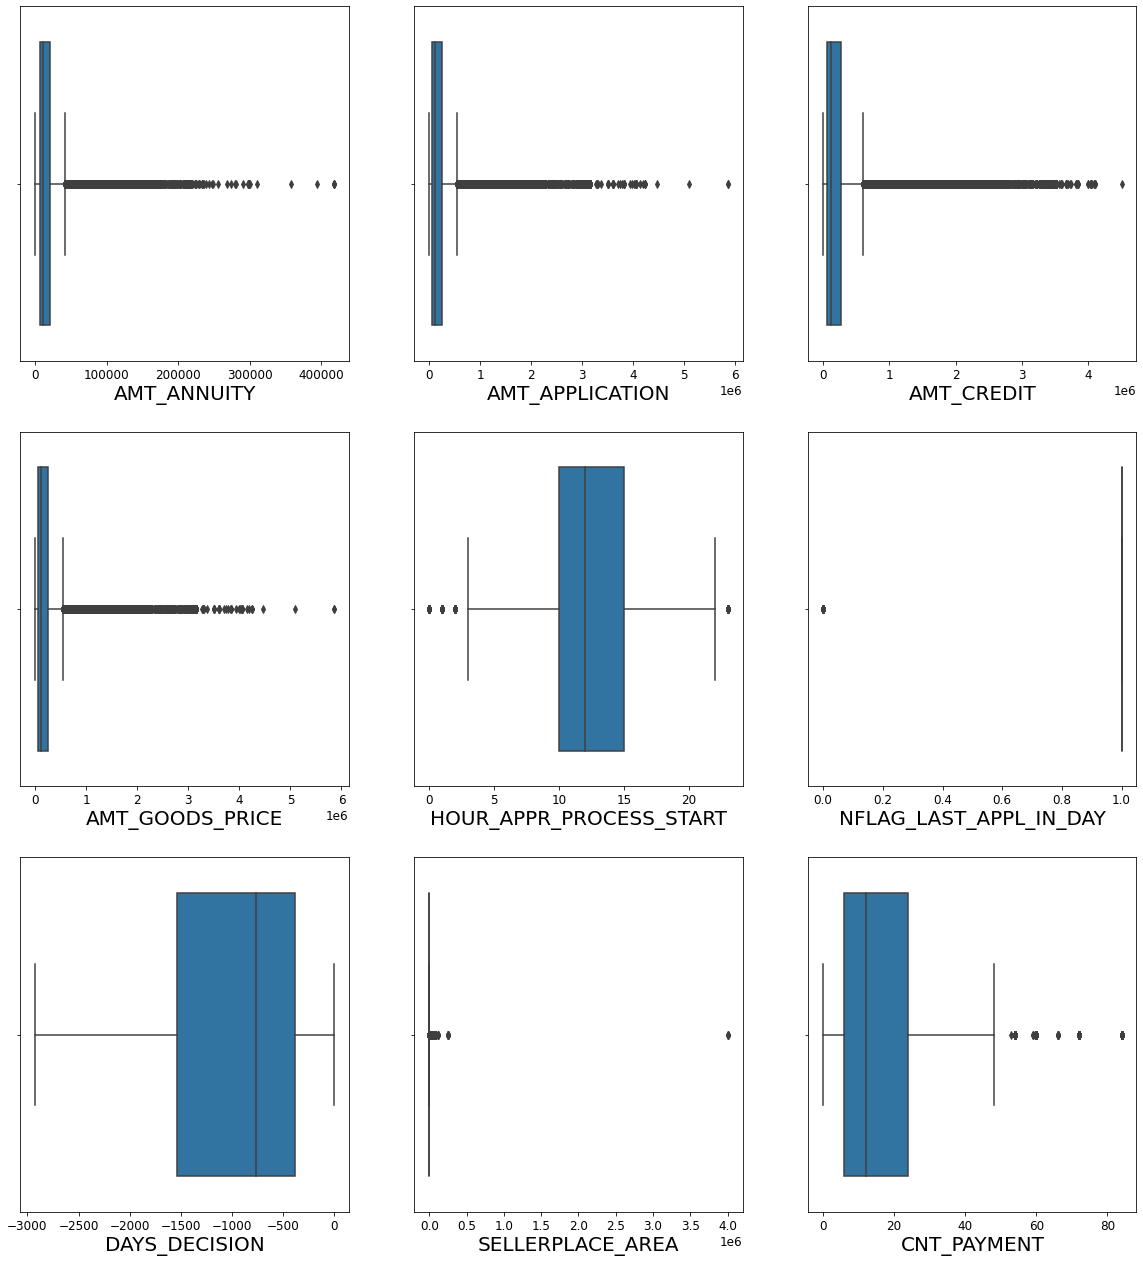

In [91]:
cols = numerical_cols
cols.remove('SK_ID_CURR')
cols.remove('SK_ID_PREV')
plt.figure(figsize=(20,30))
for i in range(0,len(cols)):
    plt.subplot(4,3,i+1)
    sns.boxplot(previous[cols[i]])

- Outlier treatment is required in SELLERPLACE_AREA, NFLAG_LAST_APPL_IN_DAY.
- DAYS_DECISION must be changed to positive values

### Analysing categorical columns unsing count plot.

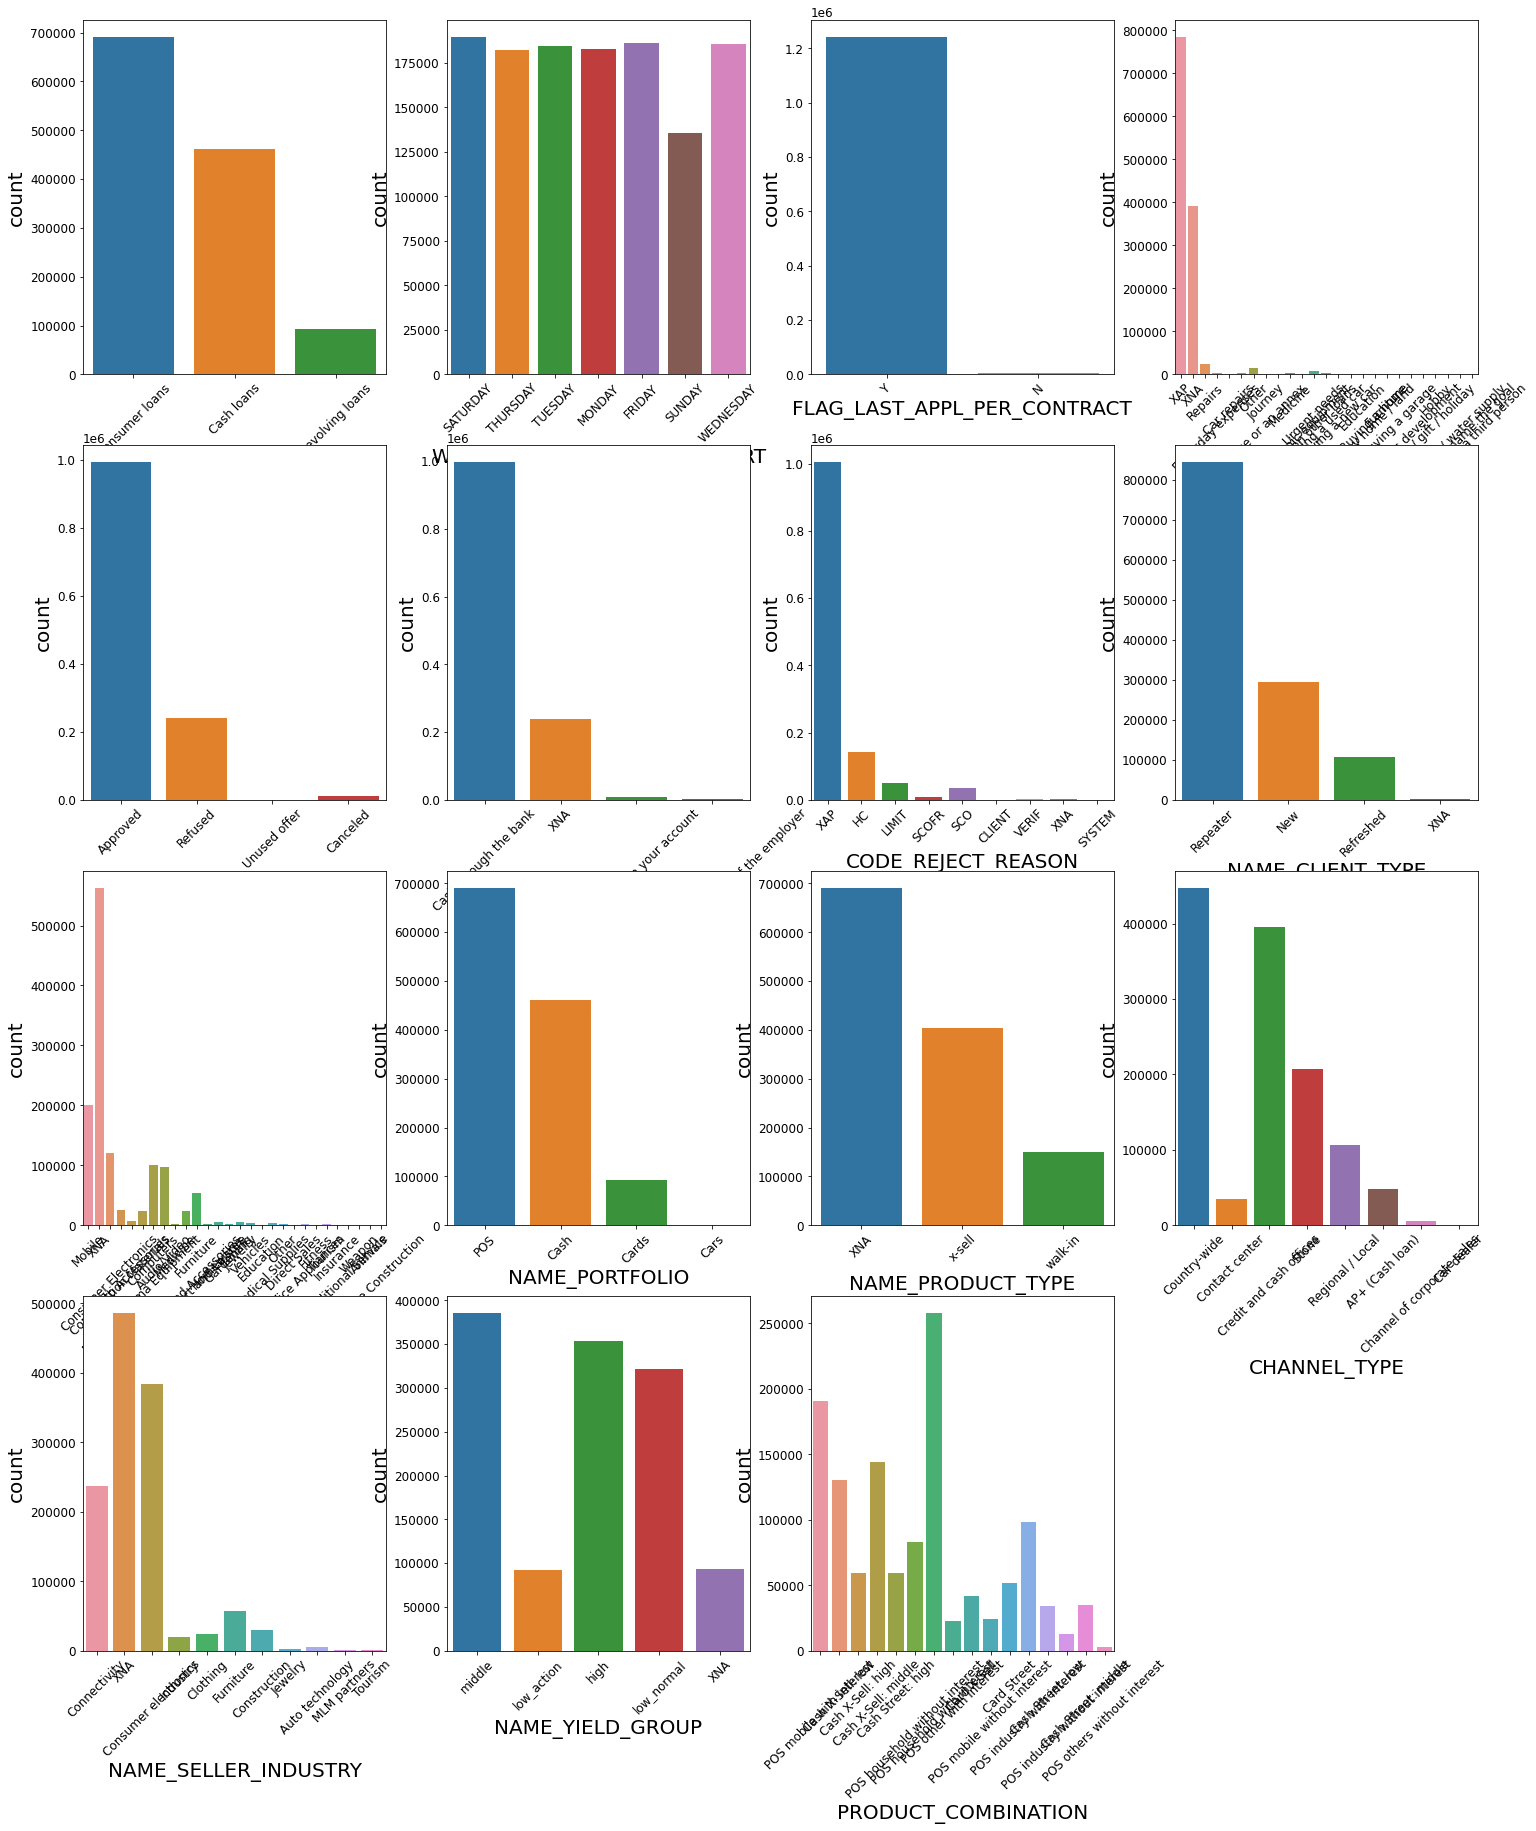

In [93]:
plt.figure(figsize = (25,30))
cols = categorical_cols
for i in range(len(cols)):
    plt.subplot(4,4,i+1)
    sns.countplot(x = previous[cols[i]])
    plt.xticks(rotation = 45)
plt.show()

-  As we see most of the loans are Approved than other cases
-  Consumer loans are more when compared to Cash loans and Revolving loans

## Merging Application and PreviousApplication data

In [125]:
total_data = app_data.join(previous,on='SK_ID_CURR',how='left',rsuffix='_PREV')

In [126]:
total_data.shape

(307511, 71)

In [127]:
cols_with_less_40_pct = (total_data.isnull().sum()/total_data.shape[0])[(total_data.isnull().sum()/total_data.shape[0])<0.4].index

In [128]:
# Dropping the columns which have more than 40% null values
total_data = total_data[cols_with_less_40_pct]

In [129]:
total_data.shape

(307511, 71)

In [130]:
# Checking for remaining null values
(total_data.isnull().sum()/total_data.shape[0])[(total_data.isnull().sum()/total_data.shape[0])>0]

AMT_ANNUITY                        0.000039
AMT_GOODS_PRICE                    0.000904
NAME_TYPE_SUITE                    0.004201
OCCUPATION_TYPE                    0.313455
EXT_SOURCE_2                       0.002146
OBS_30_CNT_SOCIAL_CIRCLE           0.003320
DEF_30_CNT_SOCIAL_CIRCLE           0.003320
OBS_60_CNT_SOCIAL_CIRCLE           0.003320
DEF_60_CNT_SOCIAL_CIRCLE           0.003320
AMT_REQ_CREDIT_BUREAU_HOUR         0.135016
AMT_REQ_CREDIT_BUREAU_DAY          0.135016
AMT_REQ_CREDIT_BUREAU_WEEK         0.135016
AMT_REQ_CREDIT_BUREAU_MON          0.135016
AMT_REQ_CREDIT_BUREAU_QRT          0.135016
AMT_REQ_CREDIT_BUREAU_YEAR         0.135016
SK_ID_PREV                         0.253861
SK_ID_CURR_PREV                    0.253861
NAME_CONTRACT_TYPE_PREV            0.253861
AMT_ANNUITY_PREV                   0.253861
AMT_APPLICATION                    0.253861
AMT_CREDIT_PREV                    0.253861
AMT_GOODS_PRICE_PREV               0.253861
WEEKDAY_APPR_PROCESS_START_PREV 

In [131]:
total_data.dropna()["TARGET"].value_counts(normalize = True)

0    0.91604
1    0.08396
Name: TARGET, dtype: float64

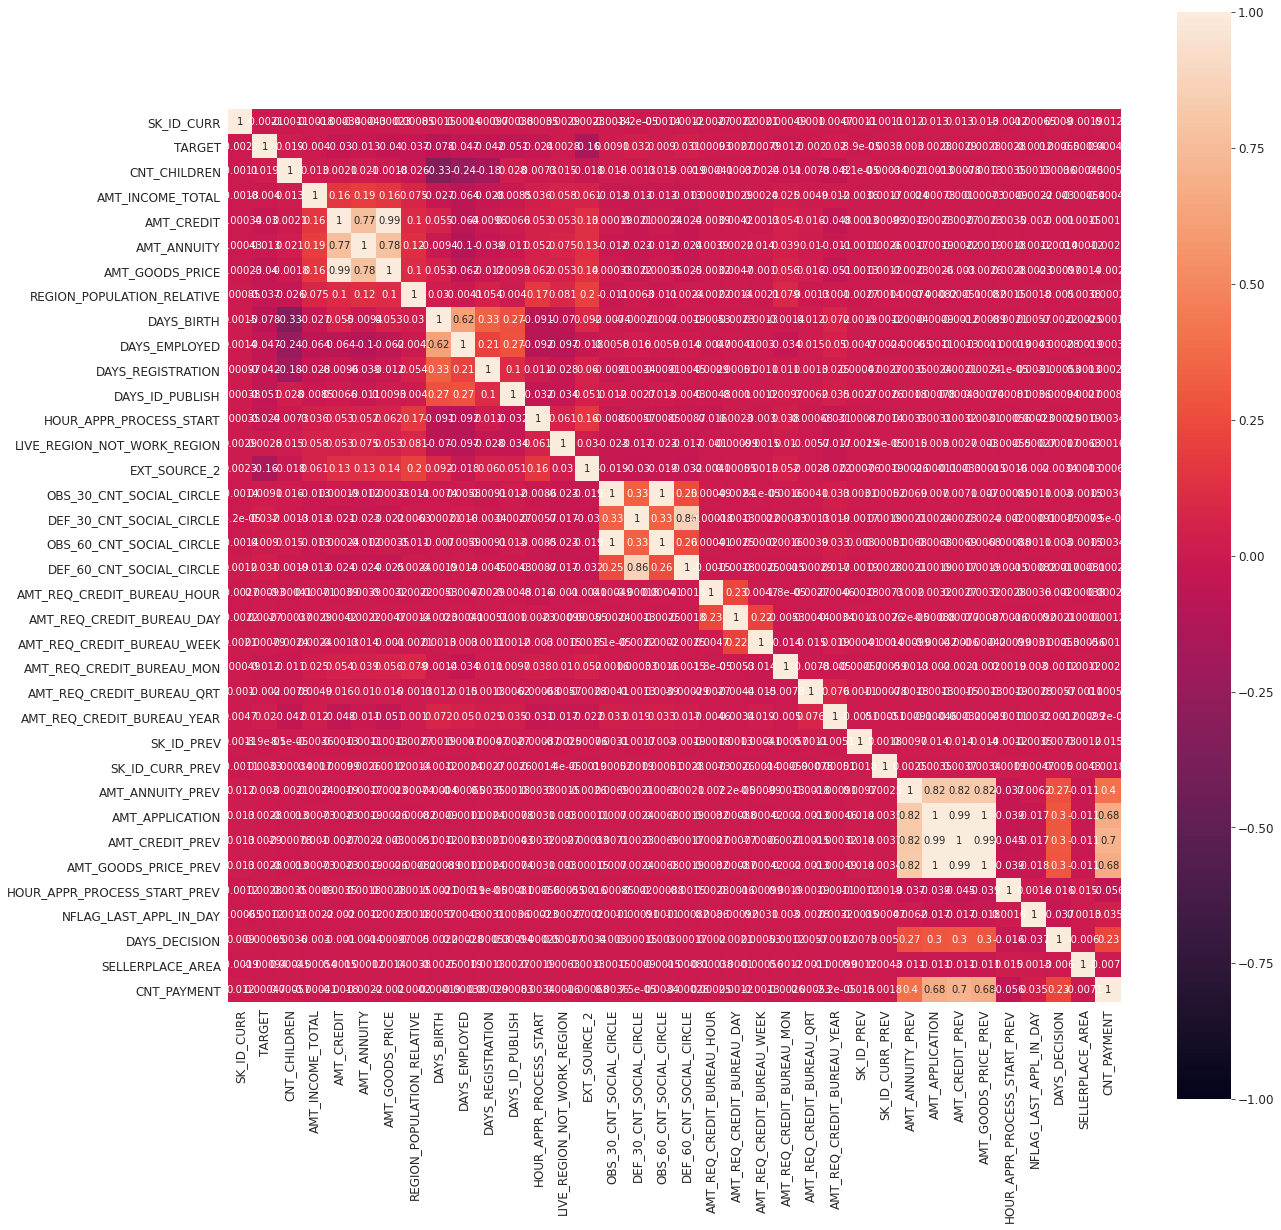

In [132]:
corr = total_data.corr()
plt.figure(figsize=(20,20))
with sns.axes_style("dark"):
     ax = sns.heatmap(corr, vmax=1,vmin=-1, square=True,annot=True)
plt.show()

-  There is Very __high correlation__ between:
    -  __AMT_GOOD_PRICE & AMT_APPLICATION__
    -  __AMT_GOOD_PRICE & AMT_CREDIT__
    -  __AMT_CREDIT & AMT_APPLICATION__
    -  __DAYS_LAST_DUE & DAYS_TERMINATION__

In [133]:
default_pctg = (app_data[app_data['TARGET'] == 1].shape[0]/app_data.shape[0])*100
print('Percentage of Defaulted loans: ',default_pctg)
print('Percentage of Non Defaulted loans: ',100-default_pctg)

Percentage of Defaulted loans:  8.072881945686495
Percentage of Non Defaulted loans:  91.92711805431351


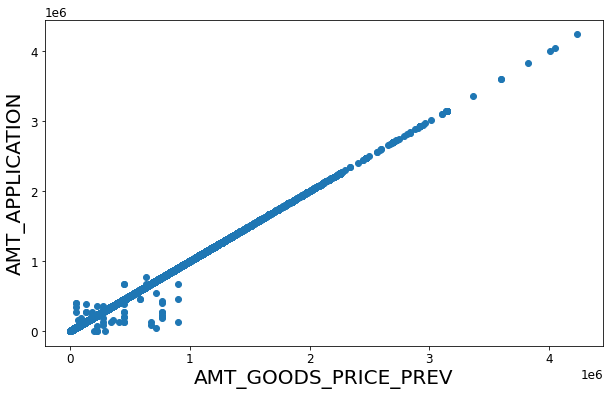

In [134]:
plt.figure(figsize=(10,6))
plt.scatter(total_data["AMT_GOODS_PRICE_PREV"], total_data["AMT_APPLICATION"])
plt.xlabel('AMT_GOODS_PRICE_PREV')
plt.ylabel('AMT_APPLICATION')
plt.show()

In [135]:
total_data["AMT_GOODS_PRICE_PREV"].corr(total_data["AMT_APPLICATION"])

0.9998880886564945

- As the correlation is high, filling Goods_Price_Prev with the same.

In [136]:
total_data["AMT_GOODS_PRICE_PREV"] = np.where(total_data["AMT_GOODS_PRICE_PREV"].isnull(),total_data["AMT_APPLICATION"], total_data["AMT_GOODS_PRICE_PREV"])

In [137]:
total_data.isnull().sum()[total_data.isnull().sum()>0]

AMT_ANNUITY                           12
AMT_GOODS_PRICE                      278
NAME_TYPE_SUITE                     1292
OCCUPATION_TYPE                    96391
EXT_SOURCE_2                         660
OBS_30_CNT_SOCIAL_CIRCLE            1021
DEF_30_CNT_SOCIAL_CIRCLE            1021
OBS_60_CNT_SOCIAL_CIRCLE            1021
DEF_60_CNT_SOCIAL_CIRCLE            1021
AMT_REQ_CREDIT_BUREAU_HOUR         41519
AMT_REQ_CREDIT_BUREAU_DAY          41519
AMT_REQ_CREDIT_BUREAU_WEEK         41519
AMT_REQ_CREDIT_BUREAU_MON          41519
AMT_REQ_CREDIT_BUREAU_QRT          41519
AMT_REQ_CREDIT_BUREAU_YEAR         41519
SK_ID_PREV                         78065
SK_ID_CURR_PREV                    78065
NAME_CONTRACT_TYPE_PREV            78065
AMT_ANNUITY_PREV                   78065
AMT_APPLICATION                    78065
AMT_CREDIT_PREV                    78065
AMT_GOODS_PRICE_PREV               78065
WEEKDAY_APPR_PROCESS_START_PREV    78065
HOUR_APPR_PROCESS_START_PREV       78065
FLAG_LAST_APPL_P

## Dropping Na values

In [138]:
total_data.dropna(inplace = True)

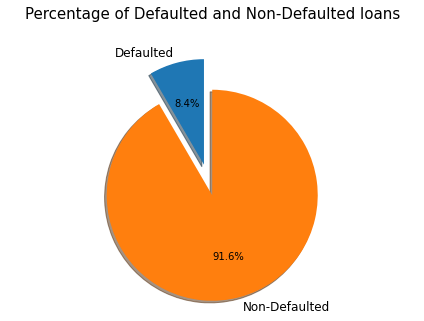

In [139]:
default_pctg = (total_data[total_data['TARGET'] == 1].shape[0]/total_data.shape[0])*100
# Labels of each slice
labels = ['Defaulted','Non-Defaulted']

# size of each slice
sizes = [default_pctg,100-default_pctg]

# To highlight Primary Sector, I am exploding it
explode = (0.3, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title('Percentage of Defaulted and Non-Defaulted loans')
plt.show()

## Final Continuous and Categorical Columns

In [140]:
# columns which are cats and continuos
final_cats = list(total_data.select_dtypes(["category", "object"]).columns)
final_conts = list(total_data.select_dtypes(["float","int"]).columns)

In [141]:
len(final_cats)

35

In [142]:
len(final_conts)

28

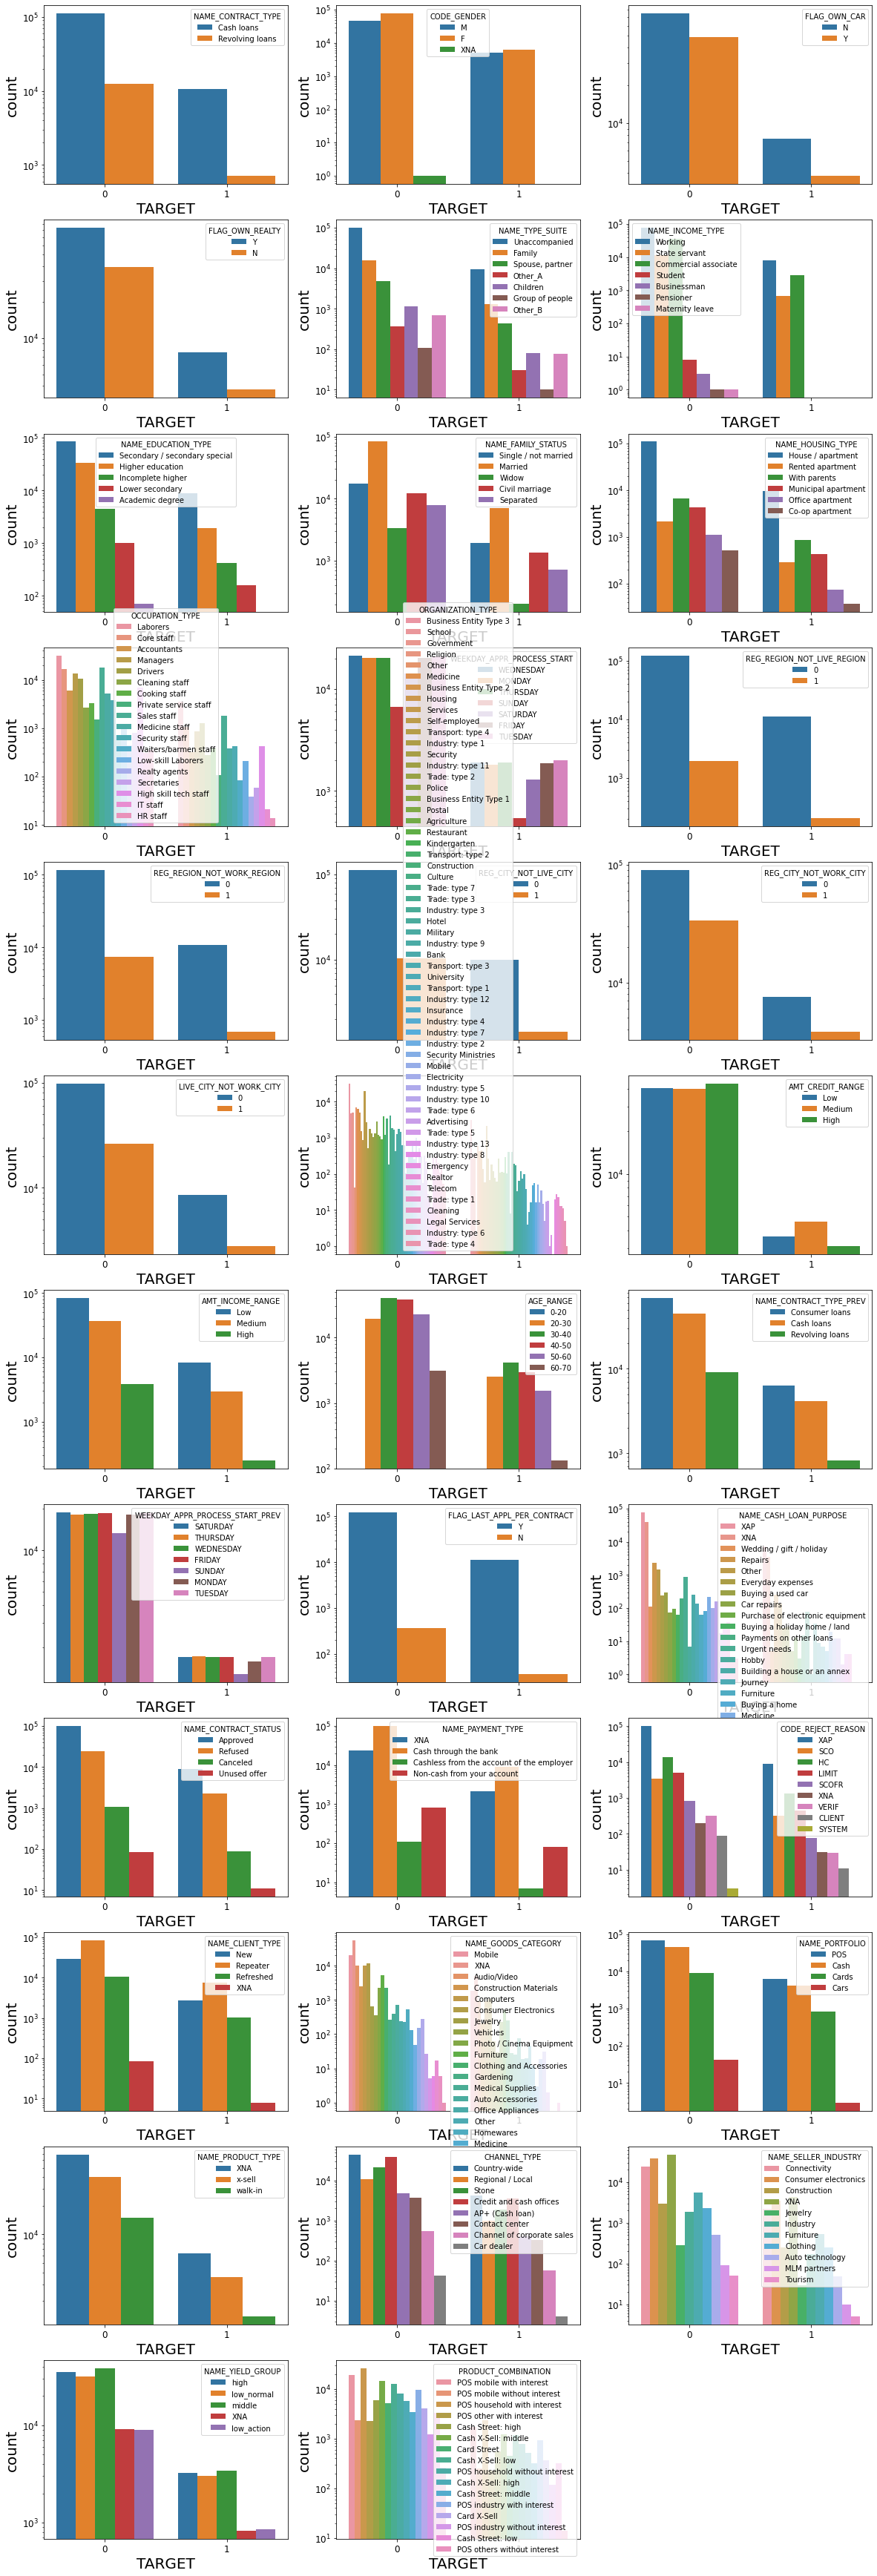

In [145]:

plt.figure(figsize=(20,100))
for i in range(0,len(final_cats)):
    plt.subplot(19,3,i+1)
    sns.countplot(data=total_data,x='TARGET',hue=final_cats[i])
    plt.yscale('log')

- Number of Female Defaulter are slighthly more than Male Defaulters
- There are less non defaulters when the income range is high.
- The number of defaulters are low in Revolving loans.
- Married people are tend to be non defaulters.
- As the education increases, the defaulters decreases.
- The number of defaulters are more when the CHANNEL_TYPE is 'Country-wide' than the number of non defaulters when the CHANNEL_TYPE is 'Channel if corporate sales'.
- When the CHANNEL_TYPE is Country-wide then the number of defaulters is highest.

In [156]:
target_0 = total_data[total_data["TARGET"]==0]
target_1 = total_data[total_data["TARGET"]==1]

## Top highly correlated variables non defaulters.

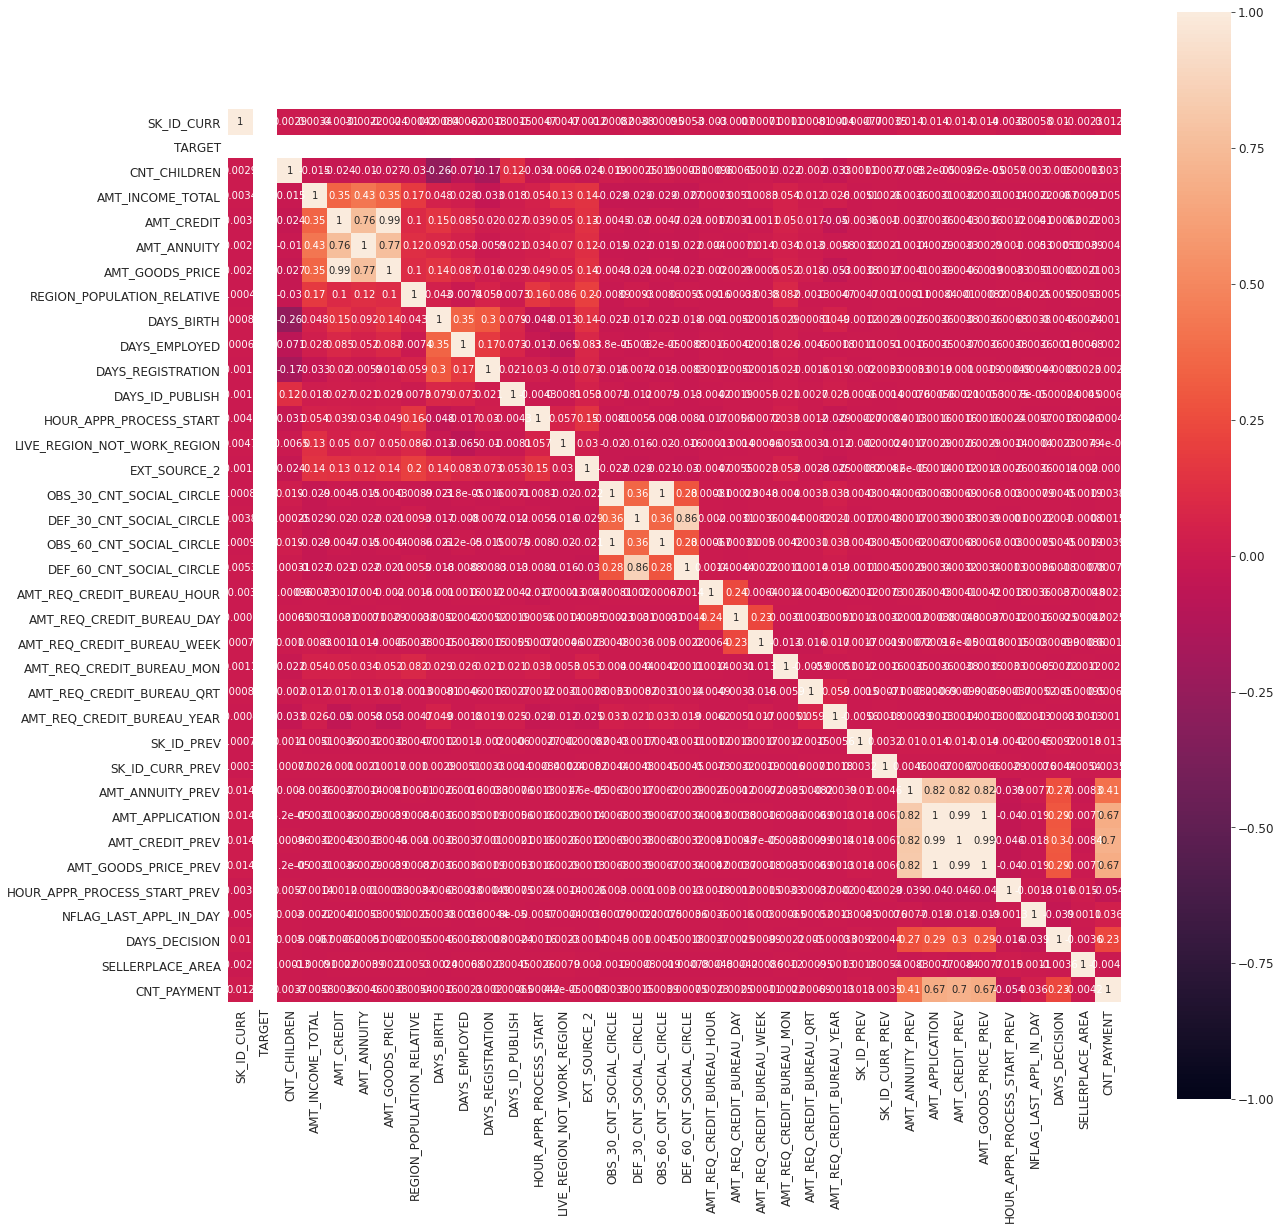

In [159]:
corr = target_0.corr()
plt.figure(figsize=(20,20))
with sns.axes_style("white"):
     ax = sns.heatmap(corr, vmax=1,vmin=-1, square=True,annot=True)
plt.show()

1. AMT_CREDIT and AMT_GOODS_PRICE
1. AMT_CREDIT_PREV and AMT_GOODS_PRICE_PREV
2. AMT_CREDIT_PREV and AMT_APPLICATION
3. REGION_RATING_CLIENT_W_CITY
5. AMT_ANNUITY_PREV and AMT_CREDIT_PREV
6. AMT_ANNUITY_PREV and AMT_GOODS_PRICE_PREV

## Top highly correlated variables defaulters.

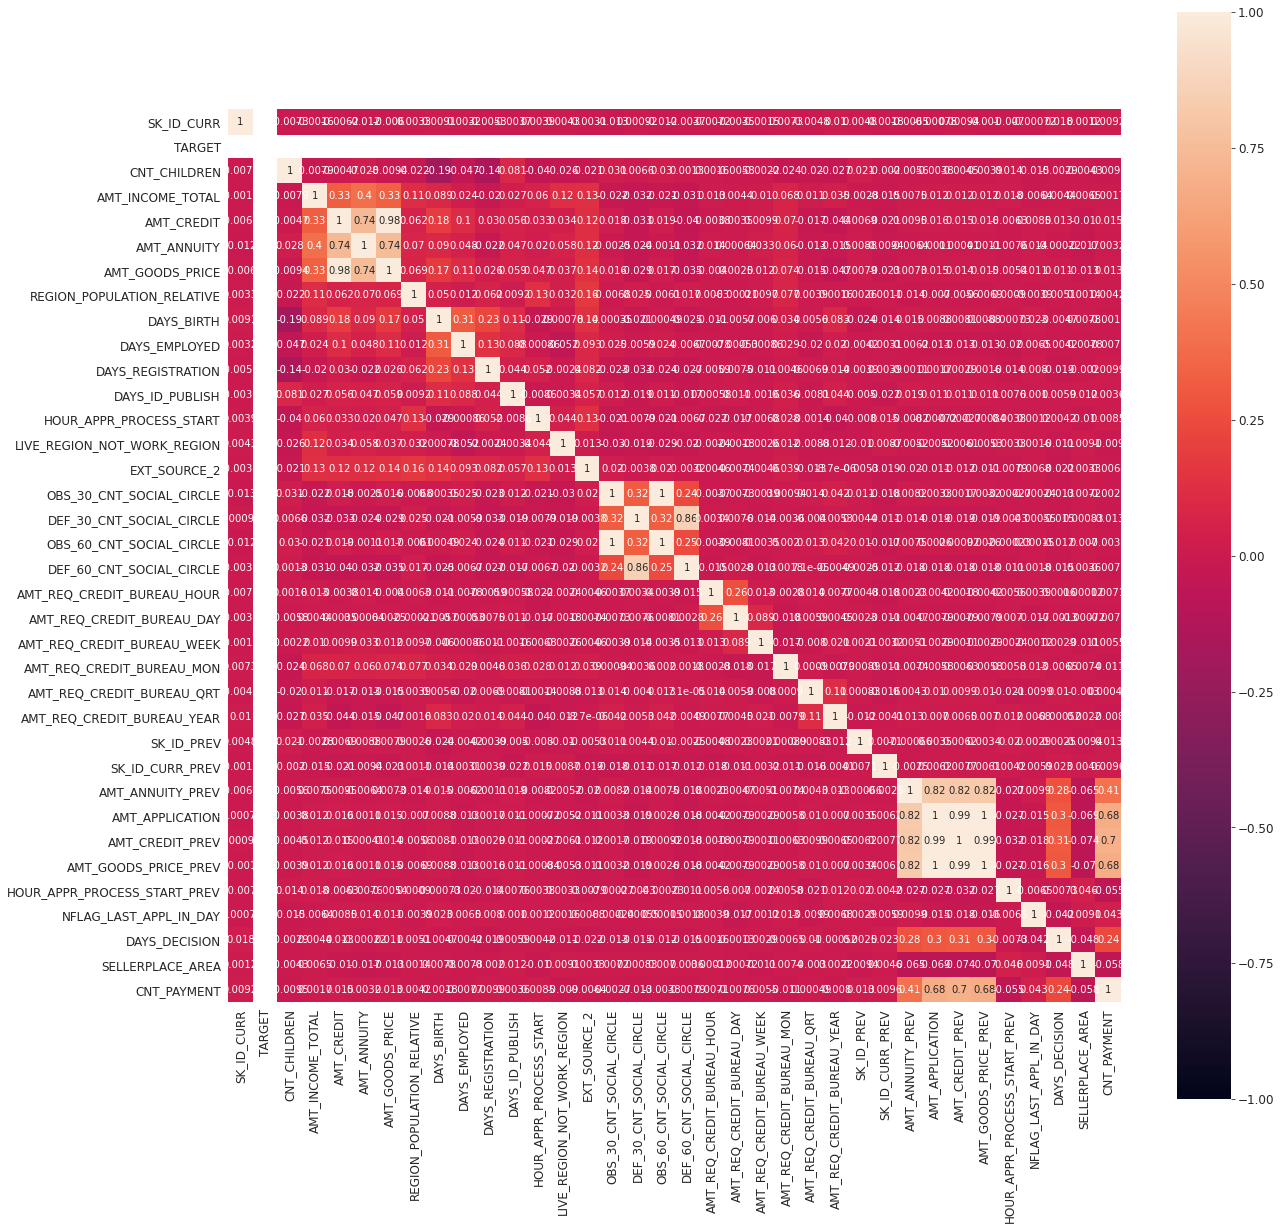

In [160]:
corr = target_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
with sns.axes_style("white"):
     ax = sns.heatmap(corr, vmax=1,vmin=-1, square=True,annot=True)
plt.show()

1. AMT_CREDIT and AMT_GOODS_PRICE
1. AMT_CREDIT_PREV and AMT_GOODS_PRICE_PREV
2. AMT_CREDIT_PREV and AMT_APPLICATION
3. REGION_RATING_CLIENT_W_CITY5. AMT_ANNUITY_PREV and AMT_CREDIT_PREV
6. AMT_ANNUITY_PREV and AMT_GOODS_PRICE_PREV